In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')


In [3]:
test = pd.read_csv('test.csv')

In [4]:
combined = pd.concat([train,test],ignore_index=False)

In [5]:
combined.shape,test.shape,train.shape

((98171, 12), (68720, 11), (29451, 12))

In [6]:
combined.isna().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
ADDRESS                      0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    68720
dtype: int64

In [7]:
combined.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [8]:
combined.duplicated().sum()

2871

In [9]:
combined.drop_duplicates(inplace=True)

In [10]:
combined.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [11]:
combined.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,95300.000000,95300.000000,95300.000000,9.530000e+04,95300.000000,95300.000000,95300.000000,95300.000000,29050.000000
mean,0.176915,0.313190,2.386684,8.054115e+03,0.823085,0.932949,21.226560,76.876867,141.712677
std,0.381599,0.463793,0.871732,1.066131e+06,0.381599,0.250112,6.168104,10.289415,650.055763
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.442587,73.783016,38.000000
50%,0.000000,0.000000,2.000000,1.171062e+03,1.000000,1.000000,20.597132,77.322738,61.750000
75%,0.000000,1.000000,3.000000,1.550121e+03,1.000000,1.000000,26.860560,78.021650,100.000000
max,1.000000,1.000000,31.000000,2.545455e+08,1.000000,1.000000,65.183330,175.278040,30000.000000


In [12]:
num_cols = combined.select_dtypes(include=np.number).columns
num_cols

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [13]:
num_cols = ['SQUARE_FT','LONGITUDE','LATITUDE','TARGET(PRICE_IN_LACS)']

In [14]:
cat_cols = combined.select_dtypes(exclude=np.number).columns
cat_cols = ['POSTED_BY','UNDER_CONSTRUCTION','RERA','BHK_NO.','BHK_OR_RK','READY_TO_MOVE',\
            'RESALE']

In [15]:
combined.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0


In [16]:
## Univariate Analysis:


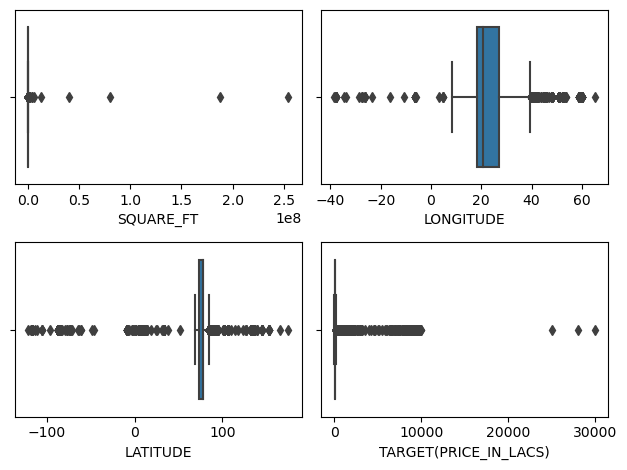

In [17]:
t = 1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=combined[i])
    t += 1
plt.tight_layout()
plt.show()

* There are many outliers in all columns we will remove most extreme.

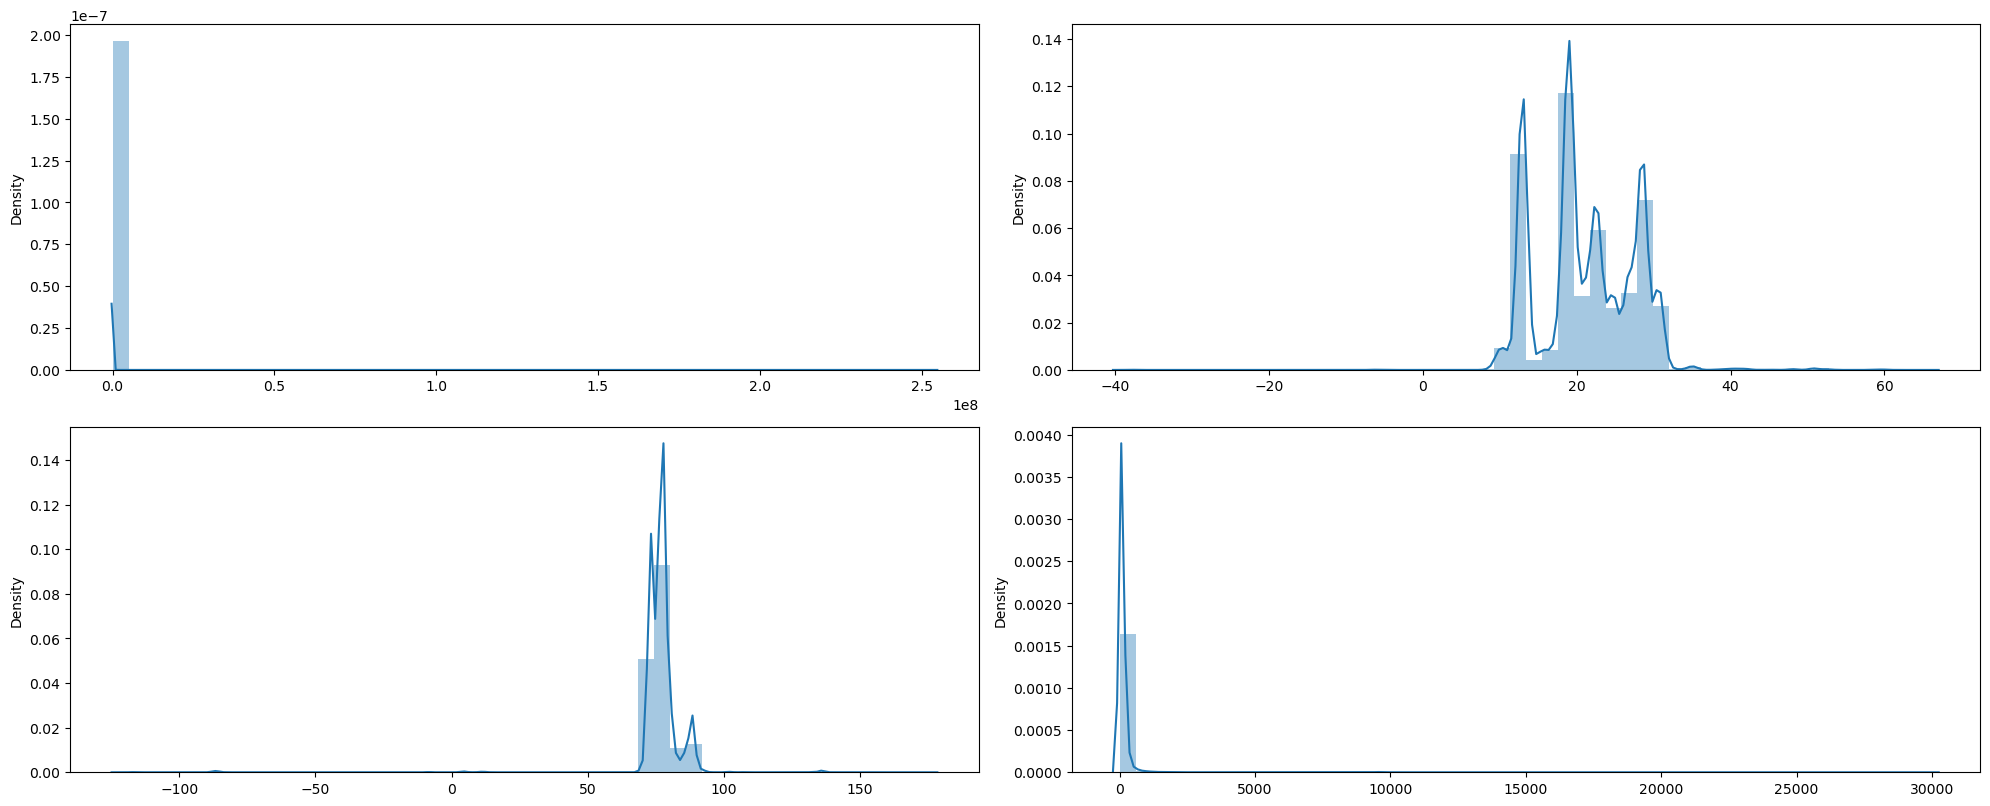

In [18]:
plt.figure(figsize=(20,20))
t = 1
for i in num_cols:
    plt.subplot(5,2,t)
    sns.distplot(x=combined[i])
    t += 1
plt.tight_layout()
plt.show()

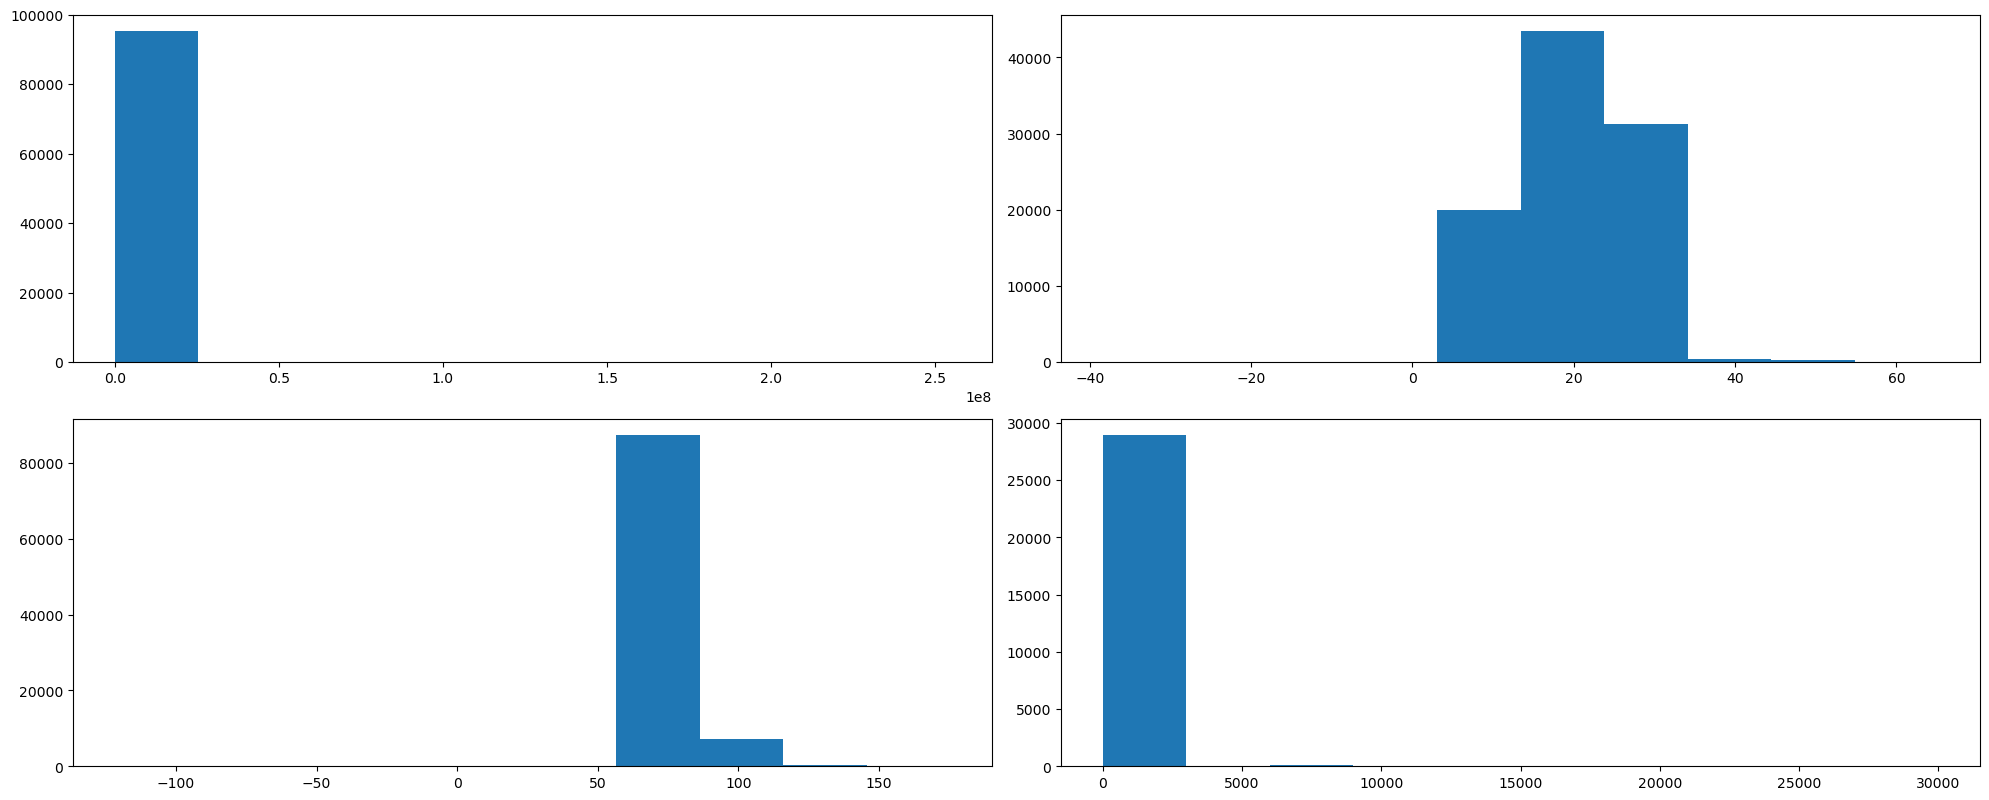

In [19]:
plt.figure(figsize=(20,20))
t = 1
for i in num_cols:
    plt.subplot(5,2,t)
    plt.hist(x=combined[i])
    t += 1
plt.tight_layout()
plt.show()

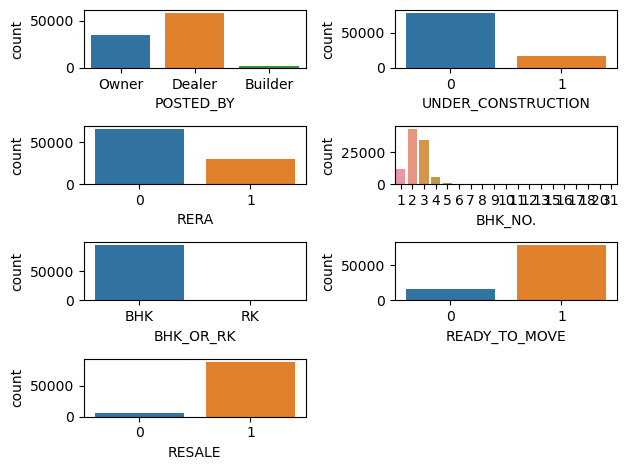

In [20]:
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(x=combined[i])
    t += 1
plt.tight_layout()
plt.show()

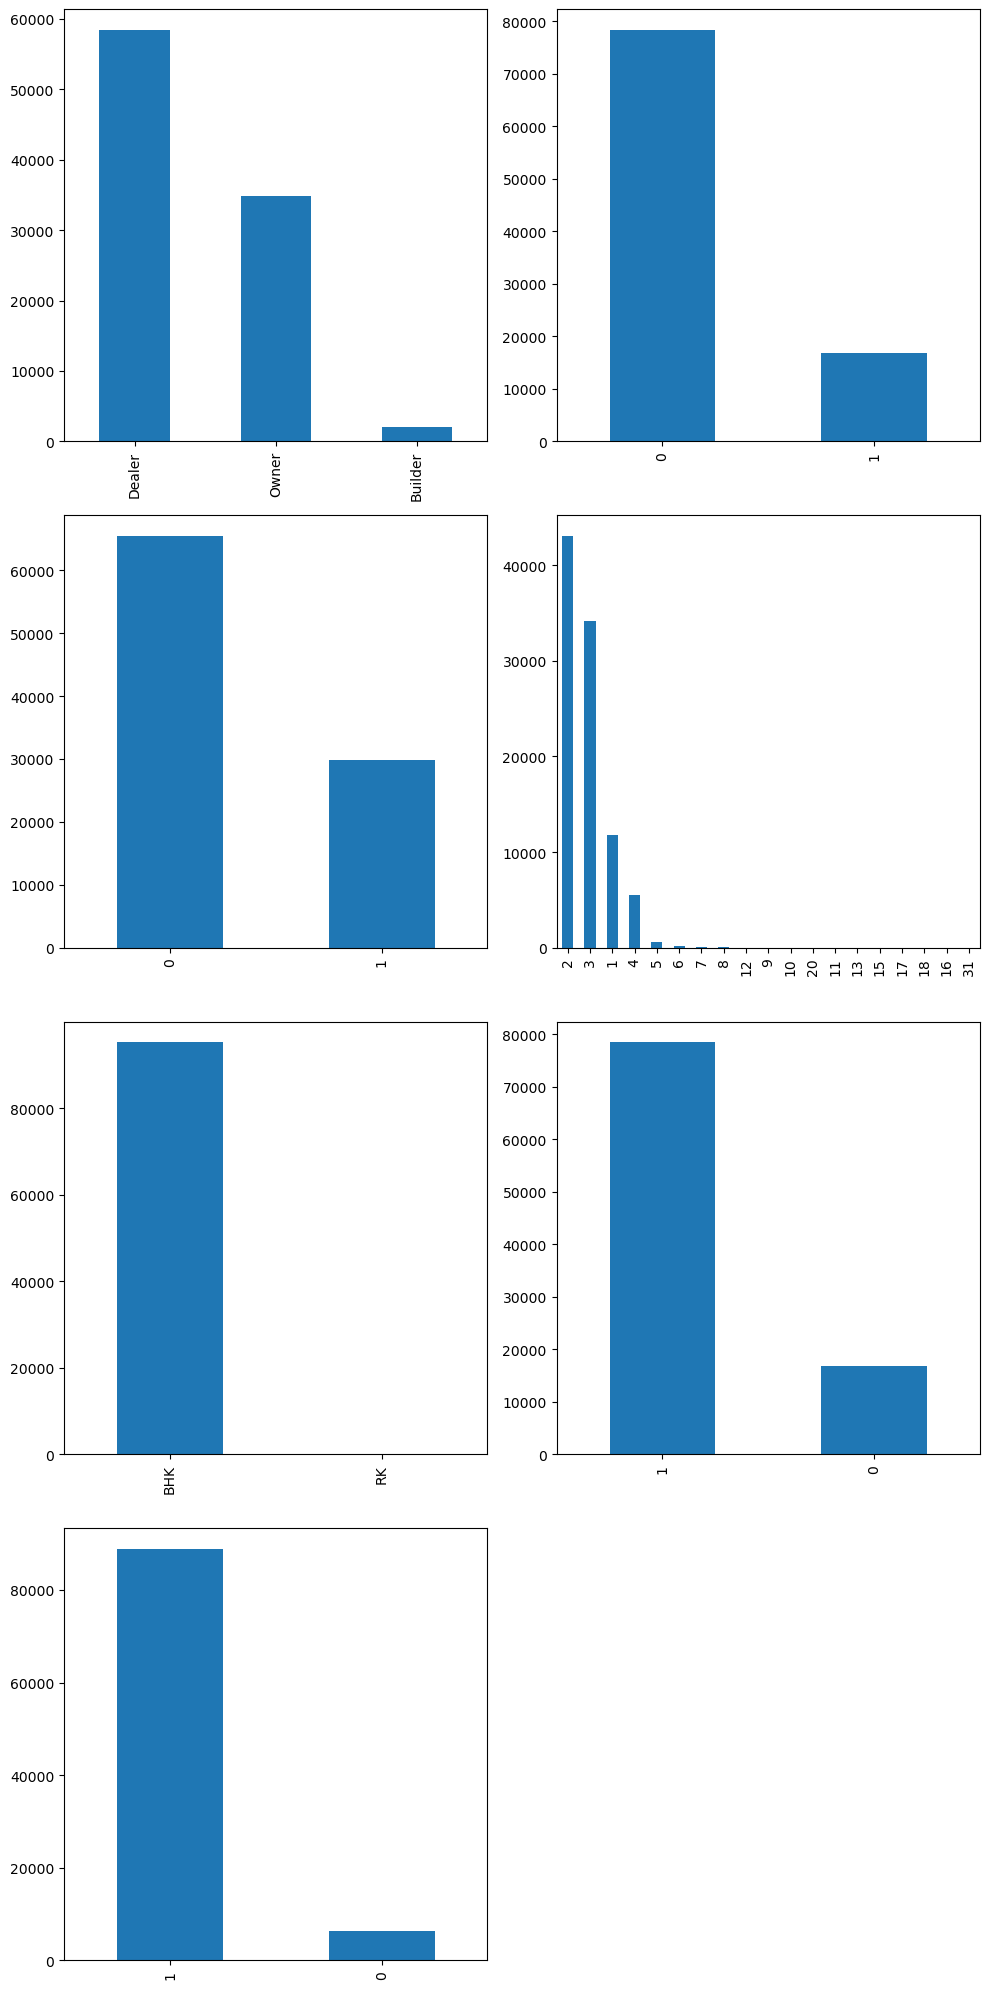

In [21]:
plt.figure(figsize=(10,20))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    combined[i].value_counts().plot(kind='bar')
    t += 1
plt.tight_layout()
plt.show()

In [22]:
combined['ADDRESS'].value_counts()

Zirakpur,Chandigarh                                1397
Raj Nagar Extension,Ghaziabad                       677
Whitefield,Bangalore                                648
Rajarhat,Kolkata                                    447
New Town,Kolkata                                    442
                                                   ... 
Paradise Circle,Secunderabad                          1
netaji Nagar,Nellore                                  1
OPPOSITE ROAD OF LIONS CLUB FUNCTION HALL,Eluru       1
Salokhe Nagar,Kolhapur                                1
Thakurganj,Lucknow                                    1
Name: ADDRESS, Length: 13322, dtype: int64

In [23]:
# Bivariate Analysis:

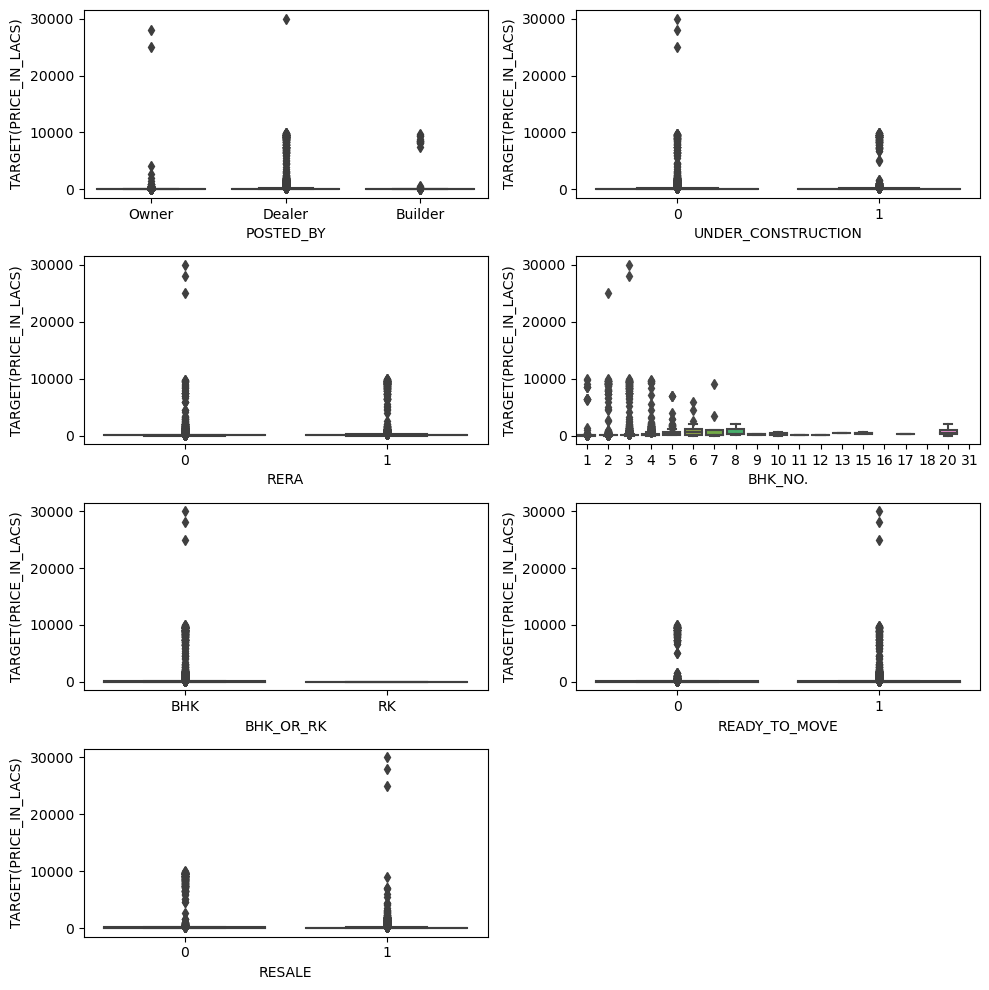

In [24]:
plt.figure(figsize=(10,10))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=combined[i],y=combined['TARGET(PRICE_IN_LACS)'])
    t += 1
plt.tight_layout()
plt.show()

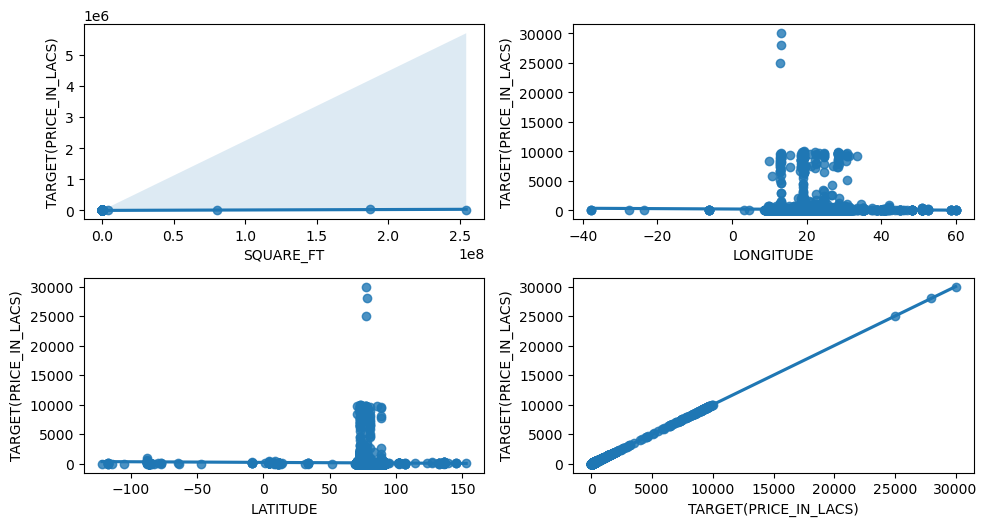

In [25]:
plt.figure(figsize=(10,10))
t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.regplot(x=combined[i],y=combined['TARGET(PRICE_IN_LACS)'])
    t += 1
plt.tight_layout()
plt.show()

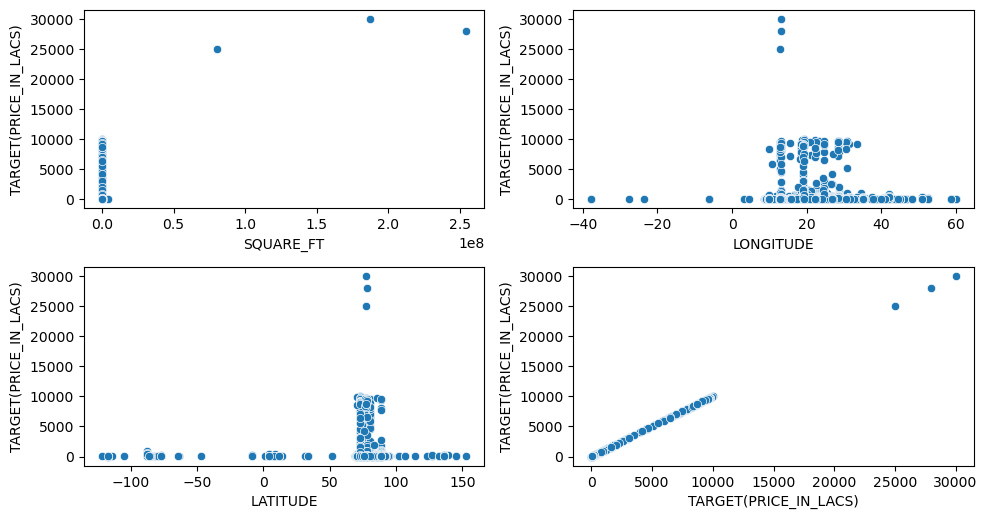

In [26]:
plt.figure(figsize=(10,10))
t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.scatterplot(x=combined[i],y=combined['TARGET(PRICE_IN_LACS)'])
    t += 1
plt.tight_layout()
plt.show()

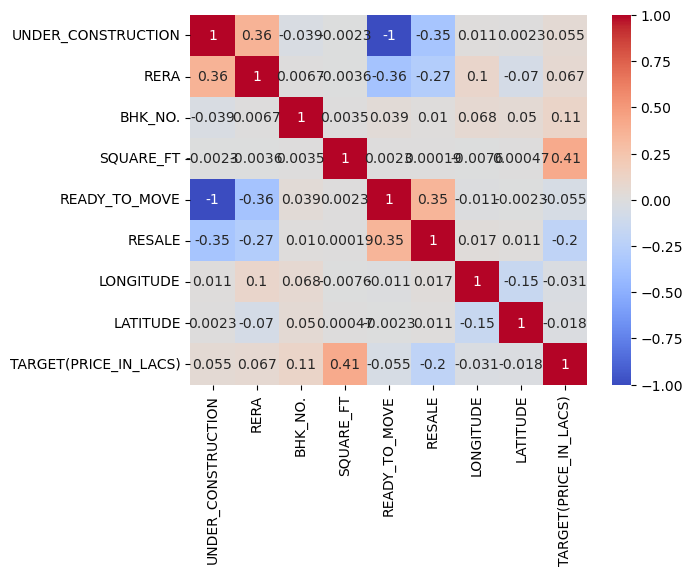

In [27]:
sns.heatmap(combined.corr(),annot=True,cmap='coolwarm');

In [28]:
combined.isna().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
ADDRESS                      0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    66250
dtype: int64

* There is no missing values there.

### Outliers Treatment

* Removing the outliers

In [29]:
df = combined[combined['SQUARE_FT']<30000000]

In [30]:
combined.shape

(95300, 12)

In [31]:
df.shape

(95296, 12)

### Feature Engg. and preprocessing

In [32]:
df['State'] = df['ADDRESS'].str.split(',',expand=True)[1]

In [33]:
df['State'] = df['State'].str.lower()

In [34]:
df['POSTED_BY'].value_counts()

Dealer     58492
Owner      34830
Builder     1974
Name: POSTED_BY, dtype: int64

In [35]:
df['POSTED_BY'].replace('Builder','Dealer',inplace=True)

In [36]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),State
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,kolkata


In [37]:
def size(x):
    if x>=4:
        return'Large'
    else:
        return 'Small'

In [38]:
df['Size'] = df['BHK_NO.'].apply(size)

In [39]:
df['BHK_OR_RK'].unique()

array(['BHK', 'RK'], dtype=object)

In [40]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),State,Size
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,bangalore,Small
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,mysore,Small
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,bangalore,Small
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,ghaziabad,Small
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,kolkata,Small


In [41]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'State', 'Size'],
      dtype='object')

In [42]:
# As the name of longitude and latitude are reversed so we have to change it.

In [43]:
df = df.rename(columns={'LONGITUDE':'Latitude','LATITUDE':'Longitude'})

In [44]:
def get_region(longitude,latitude):
    if 8.4 <= latitude <= 21:
        return "S"
    elif 25 <= latitude <= 37.6:
        return "N"
    else:
        return "C"

df['Region1'] = df.apply(lambda row: get_region(row['Longitude'],row['Latitude']), axis=1)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,Latitude,Longitude,TARGET(PRICE_IN_LACS),State,Size,Region1
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,bangalore,Small,S
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,mysore,Small,S
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,bangalore,Small,S
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,ghaziabad,Small,N
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,kolkata,Small,C


In [45]:
def get_region(latitude,longitude):
    if 68.7 <= longitude <= 71:
        return "E"
    elif 85 <= longitude <= 97.25:
        return 'W'
    else:
        return "C"


df['Region2'] = df.apply(lambda row: get_region(row['Latitude'],row['Longitude']), axis=1)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,Latitude,Longitude,TARGET(PRICE_IN_LACS),State,Size,Region1,Region2
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,bangalore,Small,S,C
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,mysore,Small,S,C
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,bangalore,Small,S,C
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,ghaziabad,Small,N,C
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,kolkata,Small,C,W


In [46]:
def final_region(Region1,Region2):
    if Region1 == 'C' and Region2 == 'C':
        return 'C'
    else:
        return Region1+Region2

def final_region(row):
    if row['Region1'] == 'C' and row['Region2'] == 'C':
        return 'C'
    else:
        return row['Region1'] + row['Region2']

# Apply the function to create the 'Final_Region' column
df['Final_Region'] = df.apply(final_region,axis=1)

In [47]:
def jadoo(final_region):
    if final_region == 'SC':
        return 'S'
    elif final_region == 'NC':
        return 'N'
    elif final_region == 'CW':
        return 'W'
    elif final_region == 'NW':
        return 'NW'
    elif final_region == 'SW':
        return 'SW'
    elif final_region == 'CE':
        return 'E'
    elif final_region == 'SE':
        return 'SE'
    elif final_region == 'NE':
        return 'NE'
    else:
        return 'C'

In [48]:
df['Final'] = df['Final_Region'].apply(jadoo)

In [49]:
df['Final'].value_counts()

S     47794
N     26089
C     11885
W      6987
NW     1081
SW      768
E       684
NE        6
SE        2
Name: Final, dtype: int64

In [50]:
df = df.drop(columns=['Region1','Region2','Final_Region'])

In [51]:
df['Region'] = df['Final']

In [52]:
df = df.drop(columns=['Final'])

In [53]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,Latitude,Longitude,TARGET(PRICE_IN_LACS),State,Size,Region
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,bangalore,Small,S
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,mysore,Small,S
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,bangalore,Small,S
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,ghaziabad,Small,N
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,kolkata,Small,W


In [54]:
del df['Latitude']
del df['Longitude']
del df['ADDRESS']

In [55]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),State,Size,Region
0,Owner,0,0,2,BHK,1300.236407,1,1,55.0,bangalore,Small,S
1,Dealer,0,0,2,BHK,1275.000000,1,1,51.0,mysore,Small,S
2,Owner,0,0,2,BHK,933.159722,1,1,43.0,bangalore,Small,S
3,Owner,0,1,2,BHK,929.921143,1,1,62.5,ghaziabad,Small,N
4,Dealer,1,0,2,BHK,999.009247,0,1,60.5,kolkata,Small,W


In [56]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'TARGET(PRICE_IN_LACS)',
       'State', 'Size', 'Region'],
      dtype='object')

In [57]:
num = ['SQUARE_FT']
cat = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA','READY_TO_MOVE', 'RESALE','BHK_NO.', 'BHK_OR_RK','State', 'Size', 'Region']

In [58]:
df = df.rename(columns={'TARGET(PRICE_IN_LACS)':'Price'})
df = df.rename(columns={'BHK_NO.':'BHK_NO'})

In [59]:
top20 = df['State'].value_counts().head(20).to_dict()

In [60]:
def state(x):
    if x in top20.keys():
        return x
    else:
        return 'Others'

In [61]:
df['State'] = df['State'].apply(state)

In [62]:
newtrain = df[df['Price'].notnull()]
newtest = df.loc[df['Price'].isna()]

In [63]:
df.shape , newtest.shape , newtrain.shape

((95296, 12), (66249, 12), (29047, 12))

In [64]:
newtrain['State'].unique()

array(['bangalore', 'Others', 'ghaziabad', 'kolkata', 'kochi', 'jaipur',
       'mohali', 'chennai', 'noida', 'pune', 'mumbai', 'nagpur',
       'faridabad', 'lalitpur', 'maharashtra', 'vadodara', 'lucknow',
       'gurgaon', 'indore', 'surat', 'chandigarh'], dtype=object)

In [65]:
a =['bangalore', 'Others', 'ghaziabad', 'kolkata', 'kochi', 'jaipur',
       'mohali', 'chennai', 'noida', 'pune', 'mumbai', 'nagpur',
       'faridabad', 'lalitpur', 'maharashtra', 'vadodara', 'lucknow',
       'gurgaon', 'indore', 'surat', 'chandigarh']
b = {}
add = 0
for i in a:
    b[i] = add
    add+=1

In [66]:
## Statistical Tests:

In [67]:
from scipy.stats import stats
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [68]:
newtrain.nunique()

POSTED_BY                 2
UNDER_CONSTRUCTION        2
RERA                      2
BHK_NO                   16
BHK_OR_RK                 2
SQUARE_FT             19558
READY_TO_MOVE             2
RESALE                    2
Price                  1169
State                    21
Size                      2
Region                    8
dtype: int64

In [69]:
model = sfa.ols('Price~POSTED_BY+State+BHK_NO+BHK_OR_RK+Region',data=newtrain).fit()
anova_lm(model).iloc[:,-1]

POSTED_BY     3.359059e-76
State         2.668533e-67
BHK_OR_RK     7.725005e-02
Region        1.635305e-02
BHK_NO       2.200295e-118
Residual               NaN
Name: PR(>F), dtype: float64

In [70]:
anova_lm(model).iloc[:,-1]<0.05

POSTED_BY     True
State         True
BHK_OR_RK    False
Region        True
BHK_NO        True
Residual     False
Name: PR(>F), dtype: bool

In [71]:
newtest['State'] = newtest['State'].map(b)
newtrain['State'] = newtrain['State'].map(b)

In [72]:
newtrain['BHK_OR_RK'] = newtrain['BHK_OR_RK'].map({'BHK':0, 'RK':1})
newtest['BHK_OR_RK'] = newtest['BHK_OR_RK'].map({'BHK':0, 'RK':1})
newtrain['Size'] = newtrain['Size'].map({'Small':0, 'Large':1})
newtest['Size'] = newtest['Size'].map({'Small':0, 'Large':1})


In [73]:
# UNDER_CONSTRUCTION+RERA BHK_OR_RK+READY_TO_MOVE+RESALE+Size
for i in ['UNDER_CONSTRUCTION','RERA','READY_TO_MOVE','RESALE','Size','SQUARE_FT','BHK_OR_RK']:
    p_value = stats.ttest_ind(newtrain[i],newtrain['Price'])[1]
    print(f'P_value for {i} is {p_value}')

P_value for UNDER_CONSTRUCTION is 0.0
P_value for RERA is 0.0
P_value for READY_TO_MOVE is 0.0
P_value for RESALE is 0.0
P_value for Size is 0.0
P_value for SQUARE_FT is 6.474886213297981e-32
P_value for BHK_OR_RK is 0.0


In [74]:
newtrain.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,Price,State,Size,Region
0,Owner,0,0,2,0,1300.236407,1,1,55.0,0,0,S
1,Dealer,0,0,2,0,1275.000000,1,1,51.0,1,0,S
2,Owner,0,0,2,0,933.159722,1,1,43.0,0,0,S
3,Owner,0,1,2,0,929.921143,1,1,62.5,2,0,N
4,Dealer,1,0,2,0,999.009247,0,1,60.5,3,0,W


In [75]:
newtrain['POSTED_BY'].value_counts()

Dealer    18579
Owner     10468
Name: POSTED_BY, dtype: int64

In [76]:
newtrain['Region'].nunique()

8

In [77]:
newtest['Region'].nunique()

9

In [78]:
num_cols

['SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

In [79]:
np.sqrt(newtrain[['SQUARE_FT','Price']]).skew()

SQUARE_FT    26.130977
Price         7.506110
dtype: float64

In [80]:
newtrain['SQUARE_FT'] = np.log(newtrain['SQUARE_FT'])
newtest['SQUARE_FT'] = np.log(newtest['SQUARE_FT'])

In [81]:
newtrain = pd.get_dummies(newtrain,drop_first=True)
newtest = pd.get_dummies(newtest,drop_first=True)

In [82]:
del newtest['Region_NE']

In [83]:
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score,GridSearchCV
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,RobustScaler

In [84]:
newtrain.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,Price,State,Size,POSTED_BY_Owner,Region_E,Region_N,Region_NW,Region_S,Region_SE,Region_SW,Region_W
0,0,0,2,0,7.170301,1,1,55.0,0,0,1,0,0,0,1,0,0,0
1,0,0,2,0,7.150701,1,1,51.0,1,0,0,0,0,0,1,0,0,0
2,0,0,2,0,6.838576,1,1,43.0,0,0,1,0,0,0,1,0,0,0
3,0,1,2,0,6.835100,1,1,62.5,2,0,1,0,1,0,0,0,0,0
4,1,0,2,0,6.906764,0,1,60.5,3,0,0,0,0,0,0,0,0,1


In [85]:
newtest.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,Price,State,Size,POSTED_BY_Owner,Region_E,Region_N,Region_NW,Region_S,Region_SE,Region_SW,Region_W
0,0,0,1,0,6.301100,1,1,NaN,19,0,1,0,0,0,0,0,0,0
1,1,1,2,0,6.684612,0,0,NaN,13,0,0,0,0,0,1,0,0,0
2,0,0,2,0,7.136560,1,1,NaN,3,0,0,0,0,0,0,0,0,1
3,0,0,3,0,7.244463,1,1,NaN,5,0,0,0,1,0,0,0,0,0
4,0,0,1,0,6.064896,1,1,NaN,1,0,1,0,0,0,0,0,0,0


In [86]:
sc = StandardScaler()
a = sc.fit_transform(newtrain[['SQUARE_FT','Price']])
newtrain['SQUARE_FT'] = a[:,0]

In [87]:
b = sc.transform(newtest[['SQUARE_FT','Price']])
newtest['SQUARE_FT'] = b[:,0]

In [88]:
del newtest['Price']

In [89]:
# Assumptions before model building
# 1. target should be numeric
# 2. No multicollinearity b/w independent variables

In [90]:
x = newtrain.drop(columns='Price')
y = newtrain['Price']

In [91]:
vif_list = []
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
                    
pd.DataFrame({'Feature Names':x.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Feature Names,VIF
5,READY_TO_MOVE,38.538601
0,UNDER_CONSTRUCTION,8.572513
13,Region_S,2.827591
11,Region_N,2.518795
2,BHK_NO,2.266940
4,SQUARE_FT,1.778864
16,Region_W,1.694092
8,Size,1.535061
7,State,1.370534
1,RERA,1.322436


In [92]:
del x['READY_TO_MOVE']
del newtest['READY_TO_MOVE']

In [93]:
vif_list = []
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
                    
pd.DataFrame({'Feature Names':x.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Feature Names,VIF
2,BHK_NO,13.288661
5,RESALE,11.510576
12,Region_S,4.401047
10,Region_N,3.063532
6,State,2.740234
8,POSTED_BY_Owner,1.900458
1,RERA,1.885072
4,SQUARE_FT,1.641552
15,Region_W,1.638216
7,Size,1.567974


In [94]:
x

,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,RESALE,State,Size,POSTED_BY_Owner,Region_E,Region_N,Region_NW,Region_S,Region_SE,Region_SW,Region_W
0,0,0,2,0,0.149188,1,0,0,1,0,0,0,1,0,0,0
1,0,0,2,0,0.115320,1,1,0,0,0,0,0,1,0,0,0
2,0,0,2,0,-0.424034,1,0,0,1,0,0,0,1,0,0,0
3,0,1,2,0,-0.430042,1,2,0,1,0,1,0,0,0,0,0
4,1,0,2,0,-0.306206,1,3,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,0,1.278863,1,1,0,1,0,1,0,0,0,0,0
29447,0,0,2,0,-0.757860,1,1,0,1,0,0,0,0,0,0,0
29448,0,0,2,0,-0.265805,1,5,0,0,0,1,0,0,0,0,0
29449,0,0,2,0,-0.435331,1,7,0,1,0,0,0,1,0,0,0


In [95]:
x_c = sma.add_constant(x)

In [96]:
model = sma.OLS(y,x_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1722.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:12:22   Log-Likelihood:            -2.1667e+05
No. Observations:               29047   AIC:                         4.334e+05
Df Residuals:                   29030   BIC:                         4.335e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1076.9439     16.891     63.757      0.000    1043.836    1110.052
UNDER_CONSTRUCTION    44.0894      7.316      6.026      0.000      29.749      58.430
RERA                   1.2821      6.099      0.210      0.833     -10.672      13.236
BHK_NO              -281.6560      4.215    -66.824      0.000    -289.917    -273.395
BHK_OR_RK            492.0891     86.147      5.712      0.000     323.237     660.942
SQUARE_FT            499.2945      3.288    151.843      0.000     492.849     505.740
RESALE              -425.4729     10.562    -40.283      0.000    -446.175    -404.771
State                  8.7903      0.492     17.868      0.000       7.826       9.755
Size                  56.2346     12.117      4.641      0.000      32.485      79.985
POSTED_BY_Owner       38.4364      5.835      6.587      0.000      26.999      49.874
Region_E             223.0557     30.593      7.291      0.000     163.091     283.020
Region_N             -36.3032      8.728     -4.159      0.000     -53.411     -19.196
Region_NW             64.6023     25.483      2.535      0.011      14.655     114.550
Region_S              86.5158      8.291     10.434      0.000      70.264     102.767
Region_SE             48.8309    420.281      0.116      0.908    -774.939     872.601
Region_SW            -18.0196     27.611     -0.653      0.514     -72.139      36.100
Region_W             129.3542     12.413     10.421      0.000     105.025     153.683
==============================================================================
Omnibus:                    33957.284   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8703534.162
Skew:                           5.868   Prob(JB):                         0.00
Kurtosis:                      86.985   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [98]:
# base model
def base_models():
    models = dict()
    models['LR'] = LinearRegression()
    models['DTREE'] = DecisionTreeRegressor()
    models['RF'] = RandomForestRegressor()
    models['GBM'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor()
    models['ADA'] = AdaBoostRegressor()
    return models

In [99]:
from sklearn.model_selection import KFold,cross_val_score

def eval_models(model):
    cv = KFold(n_splits=5,shuffle=True,random_state=1001)
    scores = cross_val_score(estimator=model,X =x,y = y,cv=cv,scoring='r2',
                            n_jobs=-1)
    return scores




In [100]:
# lets use the functions to calculate the scores........

models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 0.47284448933274953
DTREE 0.6830551191856016
RF 0.7675647576847484
GBM 0.8092338170055264
XGB 0.8321835271395294
ADA 0.8142534173727183


In [101]:
from sklearn.ensemble import StackingRegressor

GBM = GradientBoostingRegressor()
XGB = XGBRegressor()
RF = RandomForestRegressor()

base_estimators = [('GBM',GBM),('XGB',XGB)]
stack = StackingRegressor(estimators = base_estimators,final_estimator=RF,cv=5)

pred = stack.fit(x,y).predict(newtest)

In [102]:
pred

array([  18.91716667,  128.07000649,   51.88333333, ..., 9355.85      ,
         85.17696508,  502.63416667])